In [1]:
from pathlib import Path

In [2]:
repo_dir = Path.cwd().parents[0]
repo_dir

PosixPath('/Users/ftod/GitHub/heart-disease')

In [3]:
import sys

sys.path.insert(0, f"{repo_dir}")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import heart_disease.constants as hdc
import heart_disease.data.get_dataset as hddgd

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load data

In [5]:
hddgd.get_dataset()
combined_df = hddgd.validate_and_combine_dataset()

Data files already downloaded.


In [6]:
# Convert to types supported by seaborn.
for col in [
    "thalach",
    "oldpeak",
    "trestbps",
    "age",
    "chol",
    "thalach",
    "oldpeak",
    "trestbps",
]:
    combined_df[col] = combined_df[col].astype(float)

In [7]:
combined_df["age"] = combined_df["age"].astype(int)

In [8]:
combined_df.dtypes

age            int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca             Int64
thal        category
source        object
target         int64
dtype: object

In [9]:
print(combined_df.shape)
combined_df.head()

(920, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source,target
0,63,male,typical angina,145.0,233.0,high fasting blood sugar,left ventricular hypertrophy,150.0,no exercise induced angina,2.3,downsloping,0,fixed defect,cleveland,0
1,67,male,asymptomatic,160.0,286.0,low fasting blood sugar,left ventricular hypertrophy,108.0,exercise induced angina,1.5,flat,3,normal,cleveland,1
2,67,male,asymptomatic,120.0,229.0,low fasting blood sugar,left ventricular hypertrophy,129.0,exercise induced angina,2.6,flat,2,reversable defect,cleveland,1
3,37,male,non-anginal pain,130.0,250.0,low fasting blood sugar,normal,187.0,no exercise induced angina,3.5,downsloping,0,normal,cleveland,0
4,41,female,atypical angina,130.0,204.0,low fasting blood sugar,left ventricular hypertrophy,172.0,no exercise induced angina,1.4,upsloping,0,normal,cleveland,0


# Bar plot

/home/codespace/.cache/pypoetry/virtualenvs/heart-disease-jyMfLboU-py3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


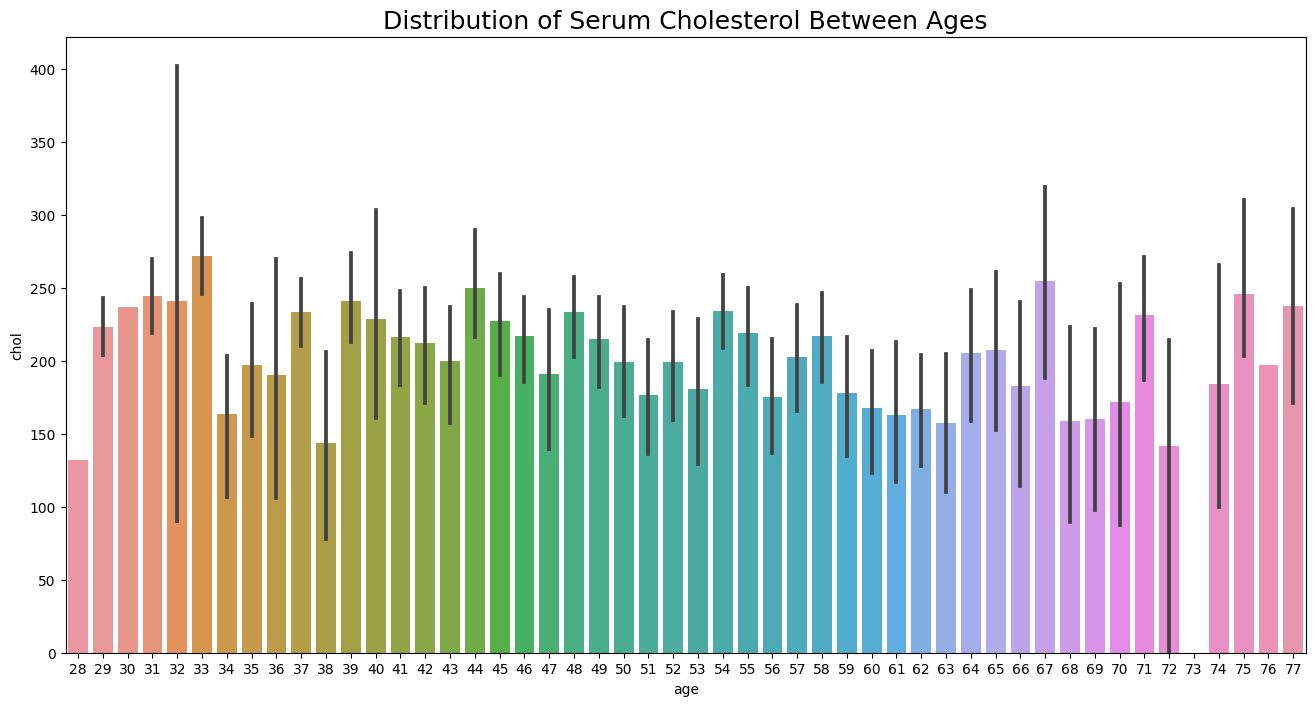

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=combined_df, x="age", y="chol")
ax.set_title("Distribution of Serum Cholesterol Between Ages", size=18);

# Box plot

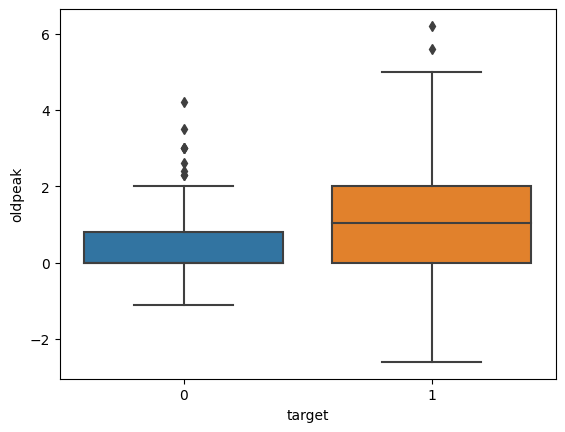

In [11]:
sns.boxplot(x="target", y="oldpeak", data=combined_df);

# Cat plot

## Box cat plot

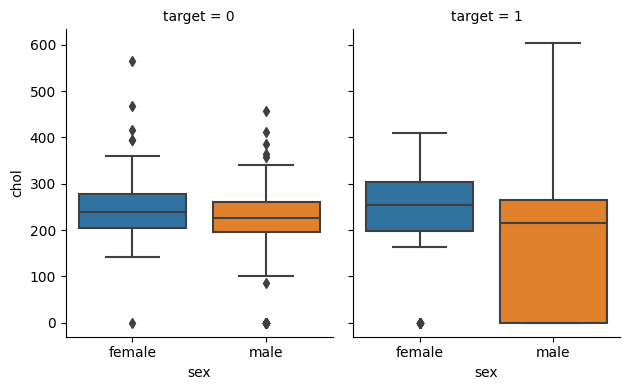

In [14]:
sns.catplot(
    x="sex", y="chol", col="target", data=combined_df, kind="box", height=4, aspect=0.8
);

## Violin cat plot

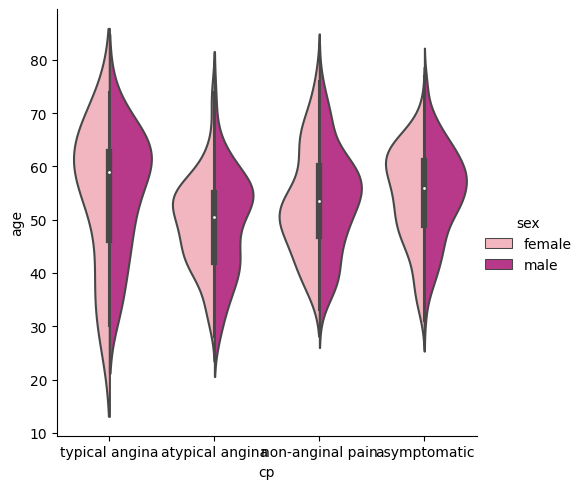

In [18]:
sns.catplot(
    data=combined_df,
    kind="violin",
    x="cp",
    y="age",
    hue="sex",
    split=True,
    palette="RdPu",
);

# Count plot

## Count plot with text

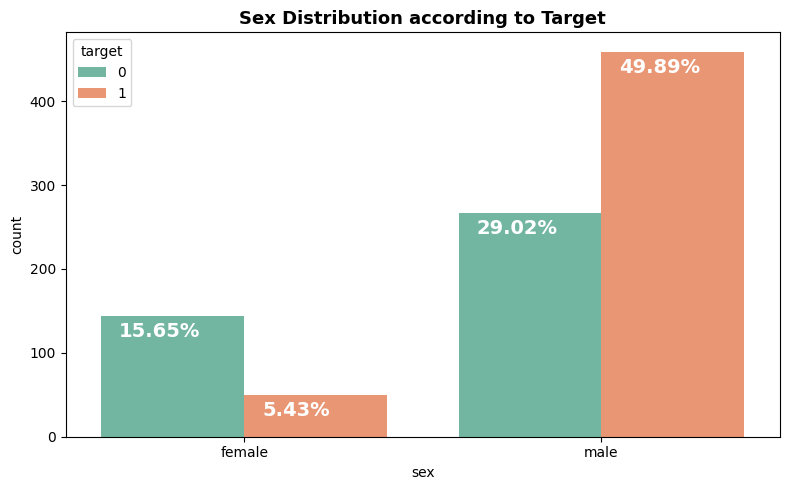

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="sex", hue="target", data=combined_df, palette="Set2")
ax.set_title("Sex Distribution according to Target", fontsize=13, weight="bold")

total = sum((i.get_height() for i in ax.patches))

for i in ax.patches:
    ax.text(
        i.get_x() + 0.05,
        i.get_height() - 25,
        str(round((i.get_height() / total) * 100, 2)) + "%",
        fontsize=14,
        color="white",
        weight="bold",
    )

plt.tight_layout();

# Joint plot

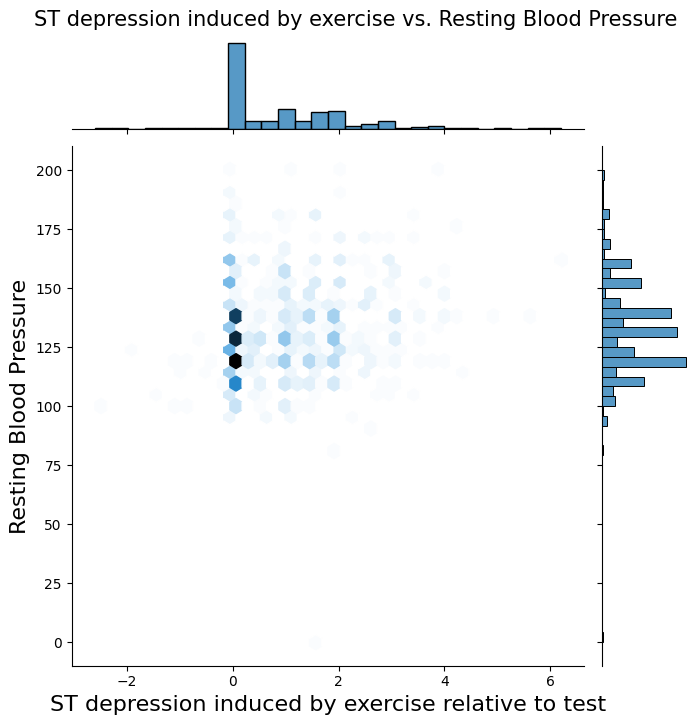

In [35]:
g = sns.jointplot(
    x="oldpeak",
    y="trestbps",
    data=combined_df,
    height=7,
    kind="hex",  # scatter | kde | hist | hex | reg | resid
)
g.set_axis_labels(
    "ST depression induced by exercise relative to test",
    "Resting Blood Pressure",
    fontsize=16,
)
g.fig.suptitle(
    "ST depression induced by exercise vs. Resting Blood Pressure", y=1.02, fontsize=15
);

# Linear model plot

/home/codespace/.cache/pypoetry/virtualenvs/heart-disease-jyMfLboU-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_2153/481136518.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


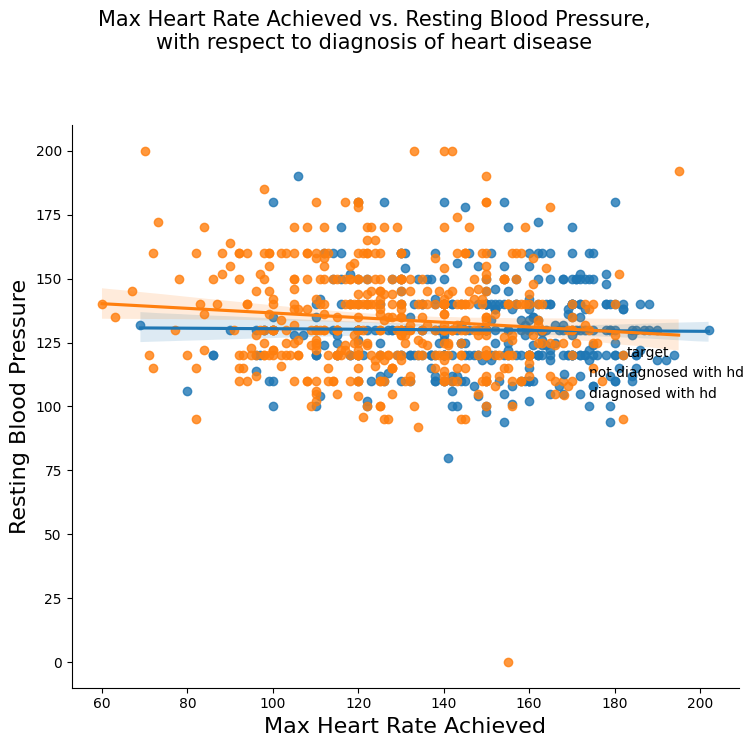

In [38]:
f = sns.lmplot(x="thalach", y="trestbps", data=combined_df, hue="target", height=7)

new_labels = ["not diagnosed with hd", "diagnosed with hd"]
for t, l in zip(f._legend.texts, new_labels):
    t.set_text(l)

f.set_axis_labels("Max Heart Rate Achieved", "Resting Blood Pressure", fontsize=16)
f.fig.suptitle(
    "Max Heart Rate Achieved vs. Resting Blood Pressure,\nwith respect to diagnosis of heart disease",
    y=1.06,
    fontsize=15,
)
plt.tight_layout();

# Pairplot

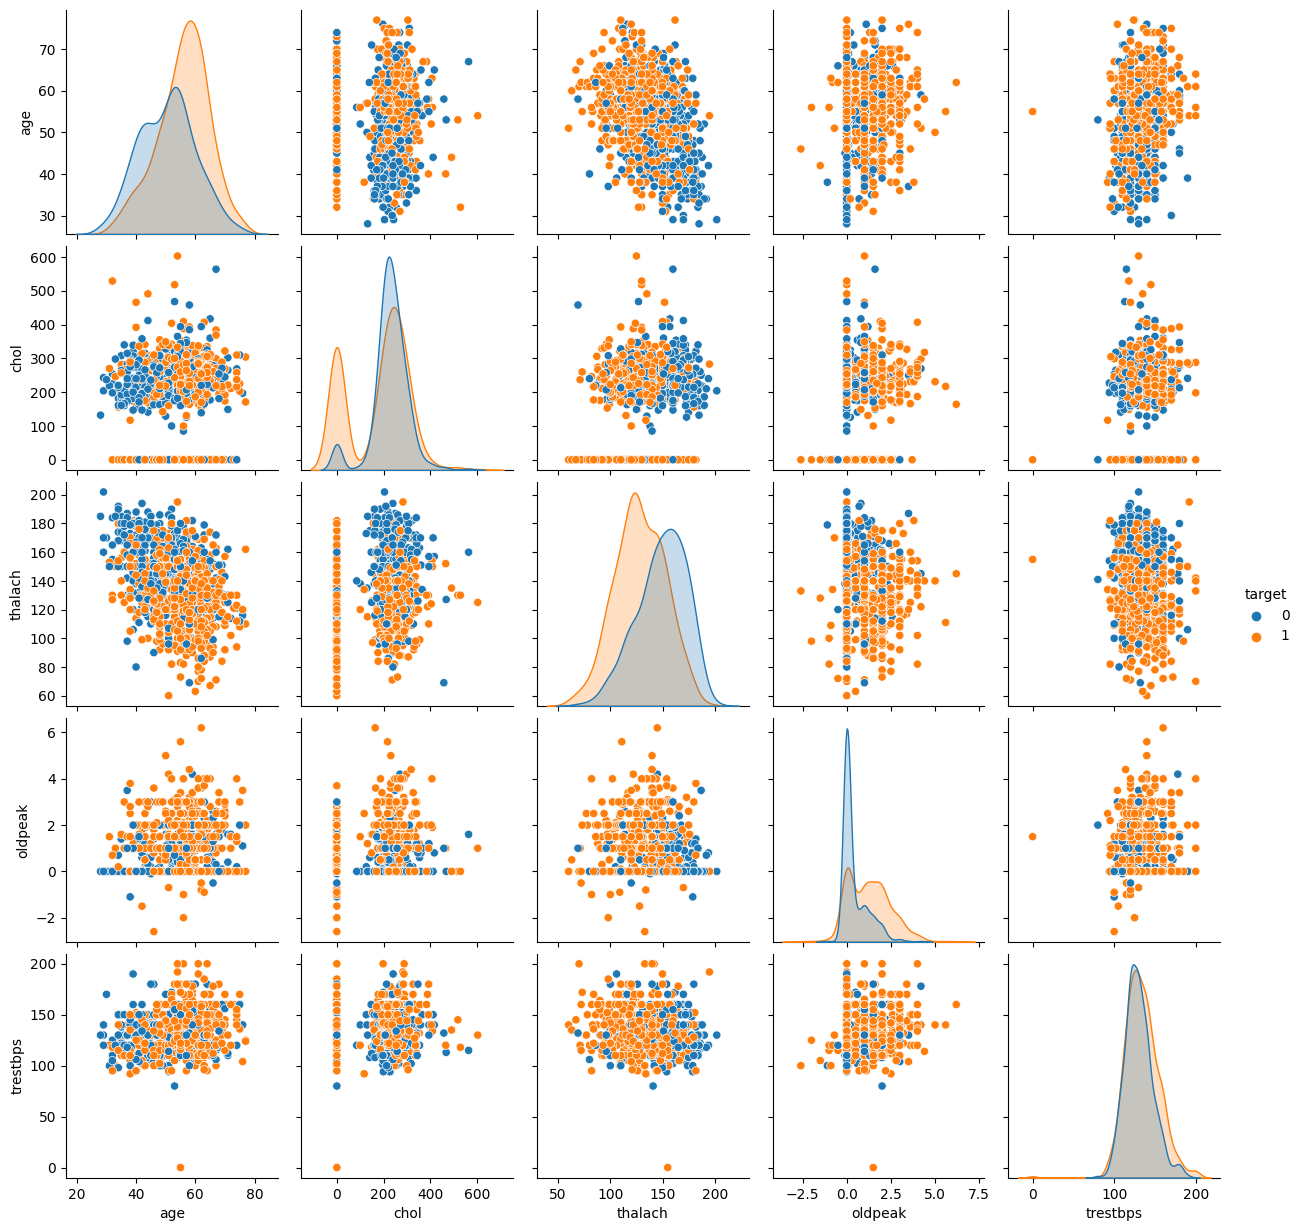

In [14]:
# define continuous variable & plot
continous_features = ["age", "chol", "thalach", "oldpeak", "trestbps"]
sns.pairplot(combined_df[continous_features + ["target"]], hue="target");

# Scatter plot

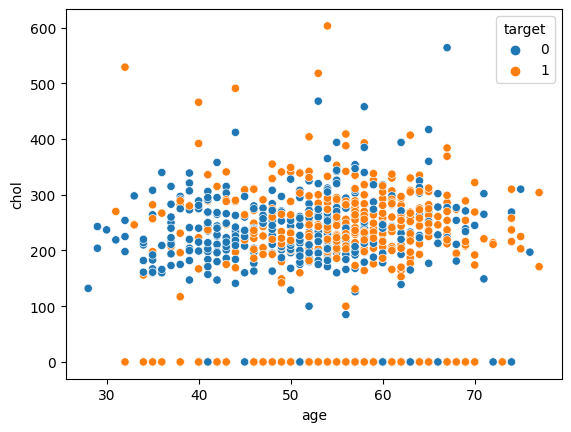

In [12]:
sns.scatterplot(x="age", y="chol", hue="target", data=combined_df);

# Violin plot

TypeError: can't get common type for non-numeric array

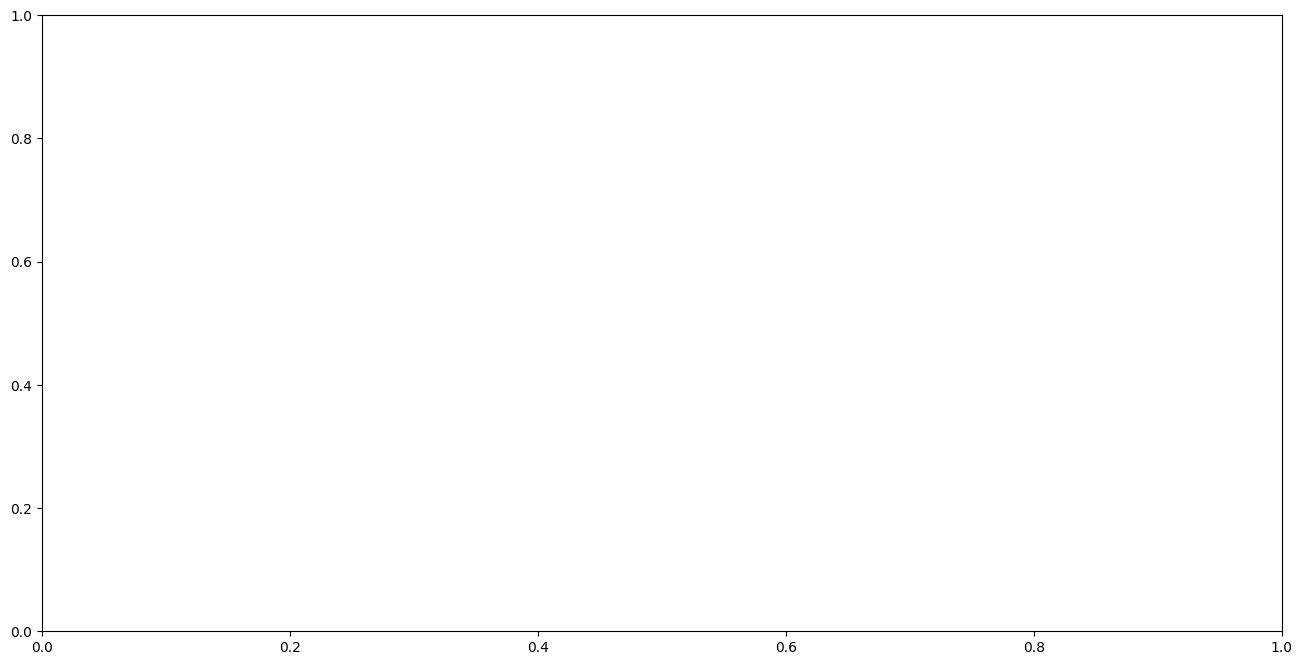

In [42]:
# FIXME: Fix cp - affects labels?
fig, ax = plt.subplots(figsize=(16, 8))
f = sns.violinplot(
    x="cp", y="age", data=combined_df, hue="sex", split=True, palette="Set1"
)
f.legend_.texts[1].set_text("male")
f.legend_.texts[0].set_text("female")
ax.set_title("Type of chest pain according to sex and age", size=18)
ax.set_xticklabels(
    ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptotic"]
);

# Correlation

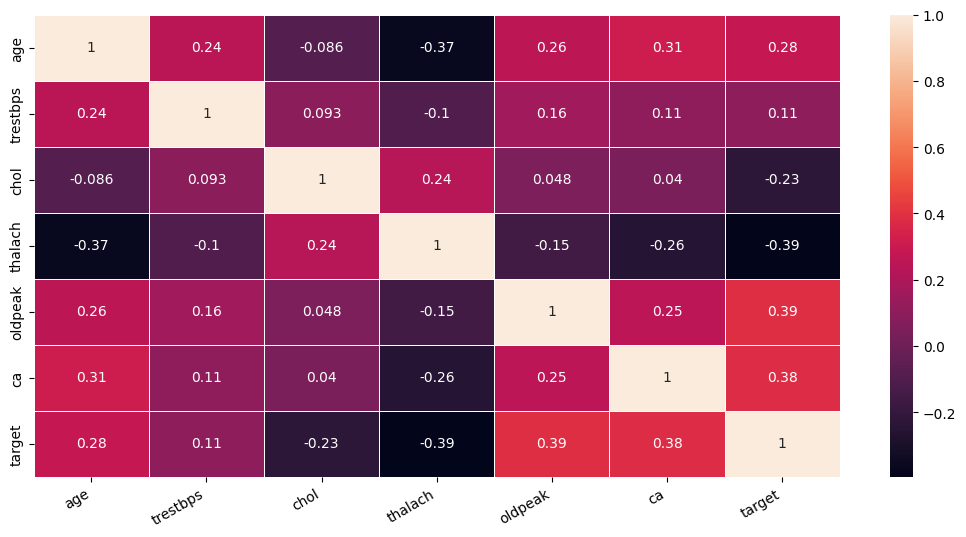

In [23]:
corrmat = combined_df[combined_df.select_dtypes(np.number).columns].corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=0.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show();